## เตรียมข้อมูลก่อนนำไปวิเคราะห์

### แบบบัญชีรายการที่ดินและสิ่งปลูกสร้าง ภ.ด.ส. 3 เทศบาลเมืองลำพูน อำเภอ เมืองลำพูน จังหวัด ลำพูน

#### ปี 2566

เปิดไฟล์และทำความสะอาดข้อมูล

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

เติมค่า null และเปลี่ยนประเภทของข้อมูลให้เป็นตัวเลข

In [2]:
df_66 = pd.read_csv("dataset/2566.csv")
df_66 = df_66.replace(',','', regex=True)

In [3]:
df_66.iloc[:, 8:] = df_66.iloc[:, 8:].fillna("0")
df_66 = df_66.fillna("-")
df_66.iloc[:, 8:] = df_66.iloc[:, 8:].astype(float)

จำแนกลักษณะการทำประโยชน์

In [4]:
# สร้างคอลัมม์ใหม่
df_66["type_of_usage"] = pd.Series([float('NaN')] * len(df_66))

In [5]:
# จำแนกลักษณ์การทำประโยชน์จากพื้นที่ใช้งาน (usage_agriculture, usage_living, usage_other, usage_none, usage_misc)
df_66[df_66["usage_agriculture"] > 0] = df_66[df_66["usage_agriculture"] > 0].fillna("agriculture")
df_66[df_66["usage_living"] > 0] = df_66[df_66["usage_living"] > 0].fillna("living")
df_66[df_66["usage_other"] > 0] = df_66[df_66["usage_other"] > 0].fillna("other")
df_66[df_66["usage_none"] > 0] = df_66[df_66["usage_none"] > 0].fillna("wasteland")
df_66[df_66["usage_misc"] > 0] = df_66[df_66["usage_misc"] > 0].fillna("misc")                                                                            

# แสดง 10 ข้อมูลแรก
df_66[["type_of_usage"]].head(10)

,type_of_usage
0,living
1,living
2,living
3,living
4,living
5,misc
6,agriculture
7,wasteland
8,living
9,living


## วิเคราะห์ข้อมูลและรายงานผล

จากแบบบัญชีรายการที่ดินและสิ่งปลูกสร้าง ภ.ด.ส.3 เทศบาลเมืองลำพูน อำเภอเมือง จังหวัดลำพูน ในปี 2566 มีที่ดินและสิ่งปลูกสร้างจำนวน 6490 ที่

In [6]:
land = len(df_66)
land

6490

ที่ดินและสิ่งปลูกสร้างสามารถจำแนกจากลักษณะการทำประโยชน์ 5 รายการ ได้แก่ ประกอบการเกษตร, ใช้เพื่ออยู่อาศัย, อื่น ๆ , ไม่ใช้ประโยชน์ และ ใช้ประโยชน์หลายประเภท

มีพื้นที่ประกอบเกษตรกรรม 569 พื้นที่ คิดเป็น 8.7673 เปอร์เซ็นของพื้นที่ทั้งหมดในอำเภอเมือง จังหวัดลำพูน

In [7]:
(len(df_66[df_66["type_of_usage"] == "agriculture"]) / land) * 100  

8.7673343605547

มีพื้นที่อยู่อาศัย 4072 พื้นที่ คิดเป็น 62.7427 เปอร์เซ็นของพื้นที่ทั้งหมดในอำเภอเมือง จังหวัดลำพูน 

In [8]:
len(df_66[df_66["type_of_usage"] == "living"]) / land * 100

62.74268104776579

มีพื้นที่อื่น ๆ 574 พื้นที่ คิดเป็น 8.8444 เปอร์เซ็นของพื้นที่ทั้งหมดในอำเภอเมือง จังหวัดลำพูน

In [9]:
len(df_66[df_66["type_of_usage"] == "other"]) / land * 100

8.844375963020031

มีพื้นที่ว่างเปล่า/ไม่ทำประโยชน์ 658 พื้นที่ คิดเป็น 10.1387 เปอร์เซ็นของพื้นที่ทั้งหมดในอำเภอเมือง จังหวัดลำพูน

In [10]:
len(df_66[df_66["type_of_usage"] == "wasteland"]) / land * 100

10.138674884437595

และมีพื้นที่ใช้ประโยชน์หลายประเภท 588 พื้นที่ คิดเป็น 9.0601 เปอร์เซ็นของพื้นที่ทั้งหมดในอำเภอเมือง จังหวัดลำพูน

In [11]:
len(df_66[df_66["type_of_usage"] == "misc"]) / land * 100

9.060092449922958

จากข้อมูลข้างต้น สามารถนำมาแสดงเป็นแผนภาพได้ดังนี้

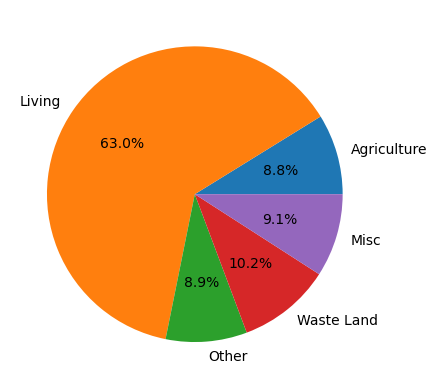

In [12]:
from matplotlib import pyplot as plt

# Create your pie chart data
data = [569, 4072, 574, 658, 588]
labels = ['Agriculture','Living','Other','Waste Land','Misc']  # Thai labels

# Create the pie chart
plt.pie(data, labels=labels, autopct='%1.1f%%')

# Set the font for the labels

plt.show()

In [17]:
# วิธีเรียกดู
# df_66[df_66["type_of_usage"] == "agriculture"]
df_66.to_csv('data.csv', index=False)

-----